In [1]:
import re
import pandas as pd
from matplotlib import pyplot
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import os
import sys

In [3]:
%matplotlib inline
sns.set()

#load the data from my drive 
df_train = pd.read_csv('/Users/albert/Documents/GitHub/housing_analysis/house-data/train.csv')

In [4]:
#delete columns with many missing data
df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis = 1,inplace=True)

#Drop rows with missing data 
df_train.dropna(inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
df_train = pd.get_dummies(df_train) #Getting dummies for categorical values

In [6]:
#Splitting test and train
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'SalePrice'], df_train['SalePrice'], test_size=0.25, random_state=42)

In [10]:
#Here I decompose each row into 10 principal components
from sklearn.decomposition import PCA

In [11]:
def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

In [12]:
#Decomposing the train set:
pca_train_results, pca_train = pca_dec(X_train, 10)

In [13]:
#Decomposing the test set:
pca_test_results, pca_test = pca_dec(X_test, 10)

#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])

In [15]:
df = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(X_train.columns)})
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
#print(df2['Variable Names'][0:11])

df.head()

,PCA,Variable Names
2,0.999730,LotArea
15,0.013377,GrLivArea
12,0.011297,1stFlrSF
11,0.010933,TotalBsmtSF
8,0.009208,BsmtFinSF1


In [16]:
X_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
758,759,160,2280,7,5,1999,1999,360.0,549,0,...,0,0,0,1,0,0,0,0,1,0
1416,1417,190,11340,4,6,1885,1950,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
693,694,30,5400,5,6,1921,1968,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
1117,1118,20,9764,5,7,1967,2003,0.0,702,0,...,0,0,0,1,0,0,0,0,1,0
197,198,75,25419,8,4,1918,1990,0.0,1036,184,...,0,0,0,1,1,0,0,0,0,0


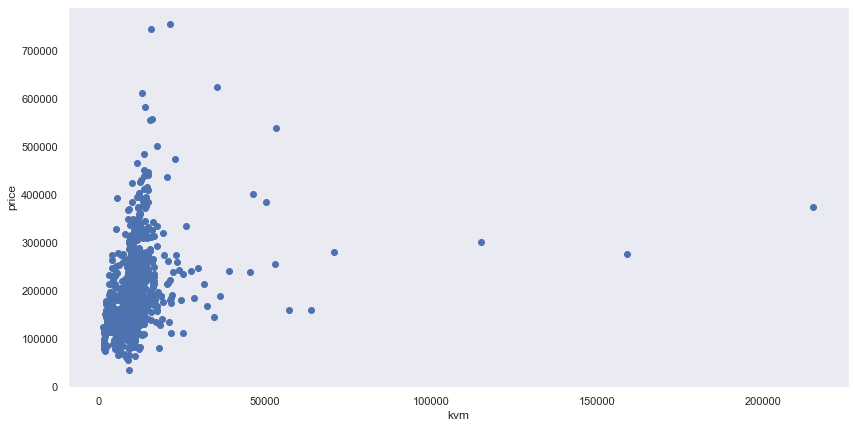

In [20]:
x = X_train["LotArea"]
y = y_train

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot()
ax.grid()
ax.set_xlabel("kvm")
ax.set_ylabel("price")
ax.scatter(x,y)

In [23]:
data_linreg = np.polyfit(x, y, 1)
print(data_linreg)

[2.17527354e+00 1.66399369e+05]
